In [1]:
# Importar librerias

import numpy as np
import skimage
from skimage import io

In [2]:
#Definir funciones

def x_transformada(x,y,alpha,x_central):
    if(x<=x_central):
        return round(x+(y*alpha)*((x_central-x)/x_central))
    if(x>x_central):
        return round(x-(y*alpha)*((x-x_central))/x_central)

def corrige_keystone(img,alpha):
    transformada=np.zeros(img.shape)
    x_central=int(img.shape[1]*0.5)
    x_max=int(img.shape[1])

    for posicion,valor in np.ndenumerate(img[:,:,:]):
            transformada[posicion[0],x_transformada(posicion[1],posicion[0],alpha,x_central),posicion[2]]=valor
    return transformada.astype(int)


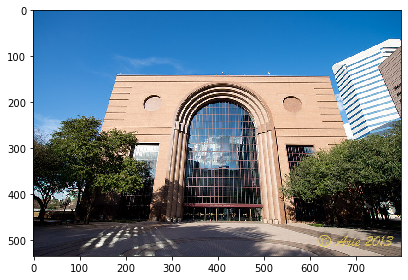

In [28]:
# test1

img1 = skimage.io.imread(fname="keystone_1.jpg")
io.imshow(img1)

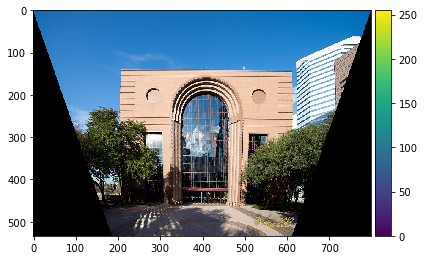

In [30]:
io.imshow(corrige_keystone(img1,0.35))

C:\Users\adanp\Anaconda3\envs\IA_Unir\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


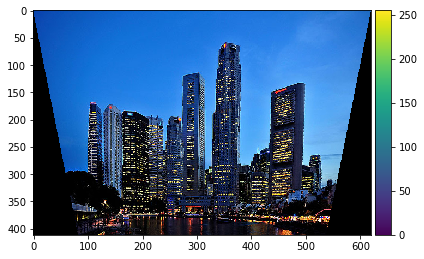

In [29]:
# test 2
img2 = skimage.io.imread(fname="keystone_2.jpg")
io.imshow(img2)
io.imshow(corrige_keystone(img2,0.20))

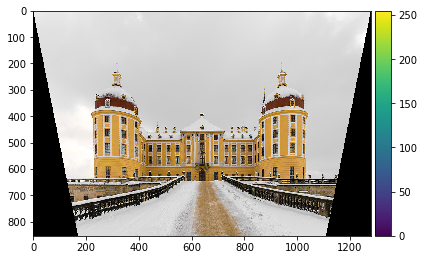

In [5]:
# test3
img3 = skimage.io.imread(fname="keystone_3.jpg")
io.imshow(img3)
io.imshow(corrige_keystone(img3,0.20))

In [6]:
# Funcion recorte automatico
def recortar_imagen_corregida(img,alpha):
    y_original,x_original,z_original=img.shape
    primera_x=x_transformada(0,y_original,alpha,x_original*0.5)
    ultima_x=x_original-primera_x
    return img[:,primera_x:ultima_x,:]

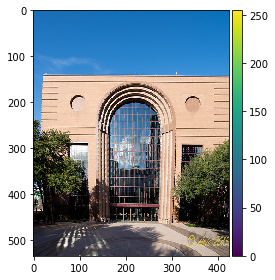

In [7]:
# test 1
io.imshow(recortar_imagen_corregida(corrige_keystone(img1,0.35),0.35))

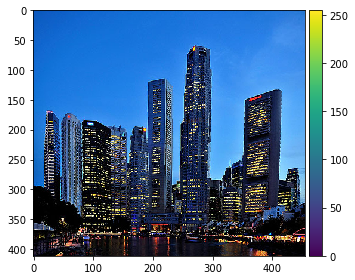

In [8]:
# test 2
io.imshow(recortar_imagen_corregida(corrige_keystone(img2,0.20),0.20))

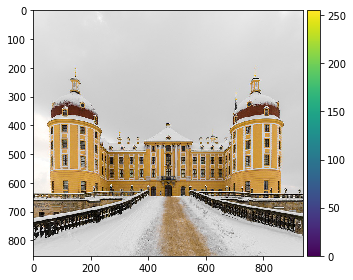

In [9]:
# test 3
io.imshow(recortar_imagen_corregida(corrige_keystone(img3,0.20),0.20))

In [10]:
# valor que mas se repite en una vertical
from scipy.stats import entropy

img_c=np.copy(recortar_imagen_corregida(corrige_keystone(img3,0.20),0.20))


(array([[ 55.,  58.,  55., ...,   0.,   0.,   0.],
        [ 61.,  45.,  58., ...,   0.,   0.,   0.],
        [ 55.,  48.,  63., ...,   1.,   0.,   0.],
        ...,
        [106.,  29.,  18., ...,   2.,   0.,  14.],
        [104.,  36.,  26., ...,   0.,   0.,  11.],
        [104.,  35.,  29., ...,   0.,   2.,   6.]]),
 array([  0.  ,  12.75,  25.5 ,  38.25,  51.  ,  63.75,  76.5 ,  89.25,
        102.  , 114.75, 127.5 , 140.25, 153.  , 165.75, 178.5 , 191.25,
        204.  , 216.75, 229.5 , 242.25, 255.  ]),
 <a list of 799 BarContainer objects>)

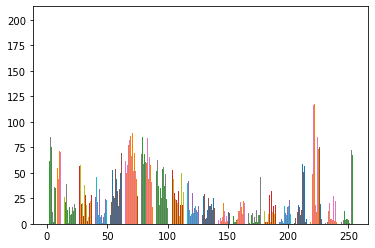

In [11]:
import matplotlib.pyplot as plt
img_bn=0.5*img1[:,:,0]+0.5*img1[:,:,1]
plt.hist(img_bn,bins=20)

C:\Users\adanp\Anaconda3\envs\IA_Unir\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


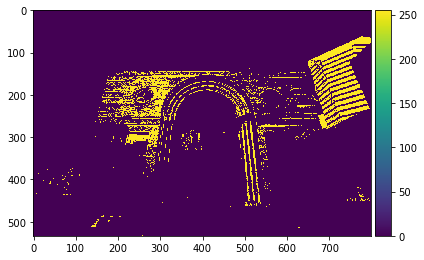

In [12]:
x_max,y_max=img_bn.shape[1],img_bn.shape[0]
img_2n=np.zeros(img_bn.shape)
for x in range(0,x_max):
    for y in range(0,y_max):
        if(img_bn[y,x]<225):
            img_2n[y,x]=0
        else:
            img_2n[y,x]=255
io.imshow(img_2n)



In [13]:
from scipy import ndimage
from skimage import color

def verticalidad(img):
    k=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
    tr=ndimage.convolve(1/3*img[:,:,0]+1/3*img[:,:,1]+1/3*img[:,:,2],k)
    return np.sum(tr[tr<400])

In [14]:
import matplotlib.pyplot as plt

def verticalidad2(img):
    mi_img=img[:,:,0]+img[:,:,1]+img[:,:,2]
    y_max,x_max=mi_img.shape
    verticales=[]
    tolerancia=50
    tolerancia2=5
    for x in range(1,x_max):
        verti=0
        for y in range(1,y_max-10):

            if(abs(mi_img[y,x]-mi_img[y,x-1])>tolerancia and abs(mi_img[y,x]-mi_img[y+1,x])<tolerancia2 and abs(mi_img[y,x]-mi_img[y+2,x])<tolerancia2 and abs(mi_img[y,x]-mi_img[y+3,x])<tolerancia2 and abs(mi_img[y,x]-mi_img[y+4,x])<tolerancia2 and abs(mi_img[y,x]-mi_img[y+5,x])<tolerancia2):
                verti=verti+1
        verticales.append(verti)
    plt.hist(verticales)
    return verticales

<ipython-input-14-bb9543f8db16>:13: RuntimeWarning: overflow encountered in ubyte_scalars
  if(abs(mi_img[y,x]-mi_img[y,x-1])>tolerancia and abs(mi_img[y,x]-mi_img[y+1,x])<tolerancia2 and abs(mi_img[y,x]-mi_img[y+2,x])<tolerancia2 and abs(mi_img[y,x]-mi_img[y+3,x])<tolerancia2 and abs(mi_img[y,x]-mi_img[y+4,x])<tolerancia2 and abs(mi_img[y,x]-mi_img[y+5,x])<tolerancia2):


508


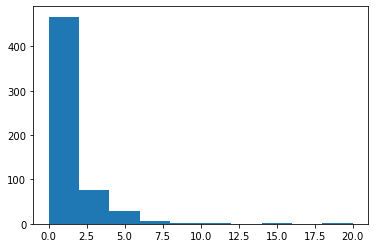

In [15]:
a=sum(verticalidad2(recortar_imagen_corregida(img1,0.2)))
print(a)

88


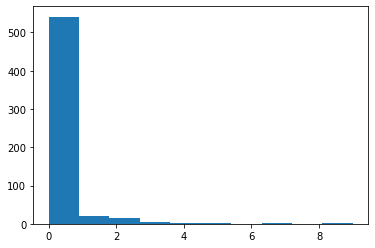

In [16]:
a=sum(verticalidad2(recortar_imagen_corregida(corrige_keystone(img1,0.2),0.2)))
print(a)

In [17]:
alpha=0.3
y_original,x_original,z_original=img3.shape
primera_x=int(x_transformada(0,y_original,alpha,x_original*0.5)*0.5)
ultima_x=int(x_original-primera_x)
print(verticalidad(corrige_keystone(img3,0.3)[0:int(y_original*0.5),primera_x:ultima_x,:]))

-126277.00000000001


In [18]:
print(verticalidad(img_c))

-610243.3333333333


In [19]:
def alpha_optimo(img):
    for alpha in range(0,50,5):
        alpha_c=alpha/100
        print(np.sum(corrige_keystone(img,alpha_c)[:,:,2]))

In [20]:
alphas=[]
vert=[]
for alpha in range(0,50,1):
    alpha=alpha/100
    alphas.append(alpha)
    vert.append(verticalidad(recortar_imagen_corregida(corrige_keystone(img3[:,:,:],alpha),alpha)))
    print(str(alpha/0.5*100))

0.0
2.0
4.0
6.0
8.0
10.0
12.0
14.000000000000002
16.0
18.0
20.0
22.0
24.0
26.0
28.000000000000004
30.0
32.0
34.0
36.0
38.0
40.0
42.0
44.0
46.0
48.0
50.0
52.0
54.0
56.00000000000001
57.99999999999999
60.0
62.0
64.0
66.0
68.0
70.0
72.0
74.0
76.0
78.0
80.0
82.0
84.0
86.0
88.0
90.0
92.0
94.0
96.0
98.0


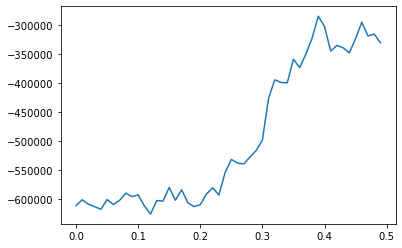

In [21]:
import matplotlib.pyplot as plt
plt.plot(alphas,vert)
plt.show()

In [22]:
alphas=[]
vert=[]

alpha=0.5
y_original,x_original,z_original=img2.shape
primera_x=int(x_transformada(0,y_original,alpha,x_original*0.5)*0.5)
ultima_x=int(x_original-primera_x)

for alpha in range(0,50,1):
    alpha=alpha/100
    alphas.append(alpha)
    vert.append(verticalidad(corrige_keystone(img2[:,:,:],alpha)[0:int(y_original*0.5),primera_x:ultima_x,:]))
    print("\r " + str(alpha))

 0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1
 0.11
 0.12
 0.13
 0.14
 0.15
 0.16
 0.17
 0.18
 0.19
 0.2
 0.21
 0.22
 0.23
 0.24
 0.25
 0.26
 0.27
 0.28
 0.29
 0.3
 0.31
 0.32
 0.33
 0.34
 0.35
 0.36
 0.37
 0.38
 0.39
 0.4
 0.41
 0.42
 0.43
 0.44
 0.45
 0.46
 0.47
 0.48
 0.49


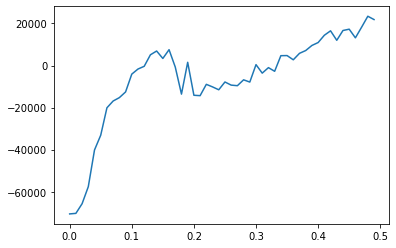

In [23]:
import matplotlib.pyplot as plt
plt.plot(alphas,vert)
plt.show()



In [24]:
print(np.sum(img3[:,:,2]))

188224370


In [25]:
print(np.sum(img_c[:,:,2]))

134428340


C:\Users\adanp\Anaconda3\envs\IA_Unir\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


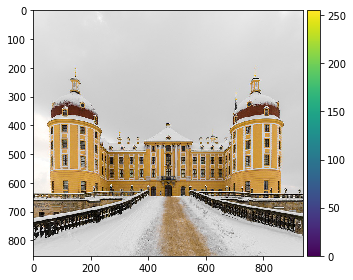

In [26]:
 #%%
io.imshow(recortar_imagen_corregida(corrige_keystone(img3,0.20),0.20))

418698


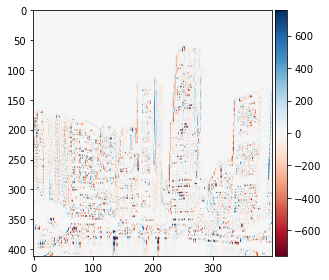

In [27]:
k=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
from scipy import ndimage
tr=ndimage.convolve(corrige_keystone(img2,0.2)[:,100:500,0],k)
io.imshow(tr)
print(np.sum(tr[tr>400]))